# PRJNA819090 - Karthykeyan et al.

Article link: https://www.nature.com/articles/s41586-022-05049-6.

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJNA819090_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,10046,+10047.T,ins:10047:1,0,375,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
2,10059,+10060.T,ins:10060:1,0,286,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
3,10065,+10066.A,ins:10066:1,0,286,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
4,10087,+10088.A,ins:10088:1,0,288,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
5,10240,+10241.A,ins:10241:1,0,26,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
6,1026,+1027.T,ins:1027:1,0,43,0,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA


In [3]:
lineages_in_paper <- c("B.1.617.2", "AY.4", "B.1.1.529", "BA.1", "BA.2", "B.1.1.7")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   6 121

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
249.664  57.566 336.945 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,0.0001017321,NA,NA,BA.2,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
2,0.0002176045,NA,NA,BA.1,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
3,0.1980501353,NA,NA,B.1.1.529,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
4,0.0001516679,NA,NA,AY.4,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
5,0.1089742269,NA,NA,B.1.1.7,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA
6,0.0605801494,NA,NA,B.1.617.2,SRR18539099,2021-01-11,SEARCH-20503,298,40368189,PRJNA819090,UCSD Campus,NA


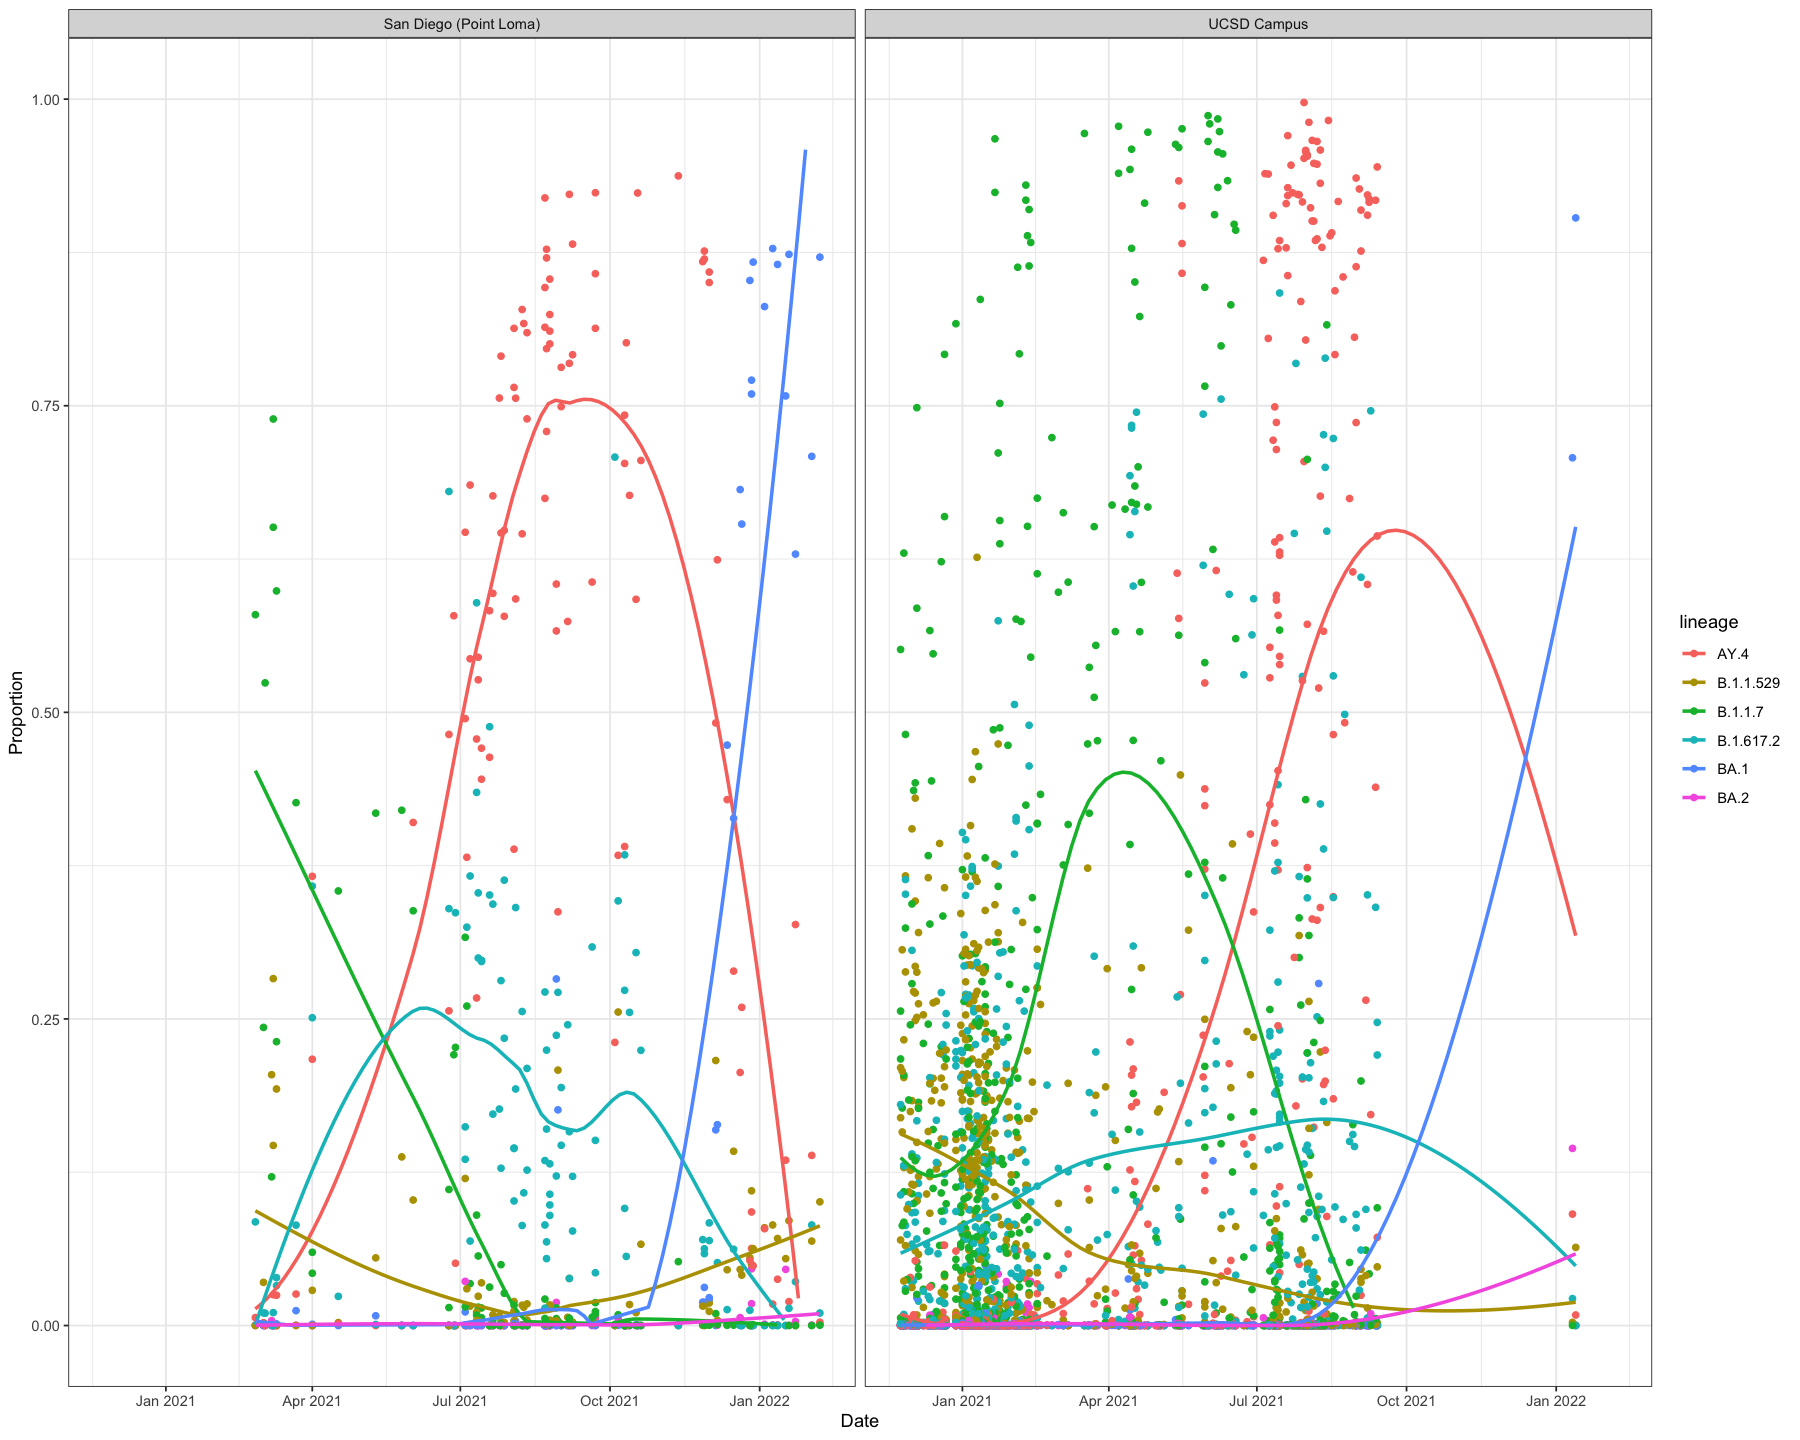

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") +
    facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
